# Risk-On Risk-Off strategy

*Investopedia definition : Risk-on risk-off is an investment setting in which price behavior responds to and is driven by changes in investor risk tolerance. Risk-on risk-off refers to changes in investment activity in response to global economic patterns.*

The stock market tends to behave according to the participant's anticipation about the future of the economy. Although anticipation do not always materialize, it is important nonetheless to consider them when making investment decisions. 



<div style="text-align: center;">
<img src="img/fredgraph.png" width=800>
<img src="img/fredgraphbc.png" width=800>
</div>

A leading indicator, is defined as a measurable set of data that may help to forecast future economic activity *(Investopedia)*. Among these, business confidence surveys happen to provide an interesting insight into a company's confidence regarding its future prospects. There are many types of business confidence surveys that may span across the regions of operations, the function of the manager surveyed, the economic sector in which the company operates and much more.

We'll use the Business Tendency Surveys for Manufacturing: Confidence Indicators: Composite Indicators: OECD Indicator for the United States. 

*OECD, "Main Economic Indicators - complete database", Main Economic Indicators (database),http://dx.doi.org/10.1787/data-00052-en
Copyright, 2016, OECD. Reprinted with permission.*

## 0. The imports

In [1149]:
import pandas as pd
import numpy as np
import math
import yfinance as yf
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_datareader as pdr
from scipy.stats import mode

import warnings
warnings.filterwarnings('ignore')

## 1. Retrieve data

### Background information

We'll retrieve a list of 8 stocks for a "risky" and a "safe" portfolio. 

Stocks in the "risky" portfolio, all belong in the information technology sector. The IT sector is considered cyclical, meaning that it tends to react symmetrically with the economy.

Stocks in the "safe" portfolio, all belong in the consumer staples sector. The CS sector is considered defensive, meaning that it tends to wether through recession very well.

Learn more : https://www.investopedia.com/articles/00/082800.asp

### What we will do

1. Select stocks

2. Download stocks using yfinance *(Yahoo Finance)*

3. Perform exploratory data analysis

4. Construct the two portfolios

5. Retrieve the economic indicator


### Selecting stocks

In [1150]:
risky_tickers = [
    "AAPL",
    "MSFT",
    "GOOG",
    "AMZN",
    "NVDA",
    "TSLA",
    "ADBE",
    "INTC"
]

safe_tickers = [
    "PG",
    "KO",
    "PEP",
    "COST",
    "WMT",
    "CL",
    "UL",
    "KDP"
]

assets = {
    "risky" : risky_tickers,
    "safe" : safe_tickers,
    "indicator" : "BSCICP03USM665S"
}

### Downloading the historical data

In [1151]:
risky_hist_prices = pd.DataFrame()
safe_hist_prices = pd.DataFrame()

start = dt.datetime(2015, 1, 1).strftime("%Y-%m-%d")
end = (dt.datetime.today() - dt.timedelta(1)).strftime("%Y-%m-%d")

for risky, safe in zip(assets["risky"],assets["safe"]):
    risky_hist_prices[risky] = yf.Ticker(risky).history(period = "1d", start=start, end=end)["Close"]
    safe_hist_prices[safe] = yf.Ticker(safe).history(period="1d", start=start, end=end)["Close"]


In [1152]:
historical_stocks = {
    "risky" : risky_hist_prices,
    "safe" : safe_hist_prices
}

for stocks in historical_stocks:
    historical_stocks[stocks].index = historical_stocks[stocks].index.date

### Exploratory data analysis on the historical stock prices

In [1153]:
risky_hist_prices_cummulative = risky_hist_prices.pct_change().cumsum()
safe_hist_prices_cummulative = safe_hist_prices.pct_change().cumsum()

In [1154]:
hist_prices = pd.concat([risky_hist_prices, safe_hist_prices], axis=1)
hist_prices_cummulative = pd.concat([risky_hist_prices_cummulative,safe_hist_prices_cummulative], axis=1)

<Axes: title={'center': 'Value of 1 dollar invested in 2015 in risky stocks'}>

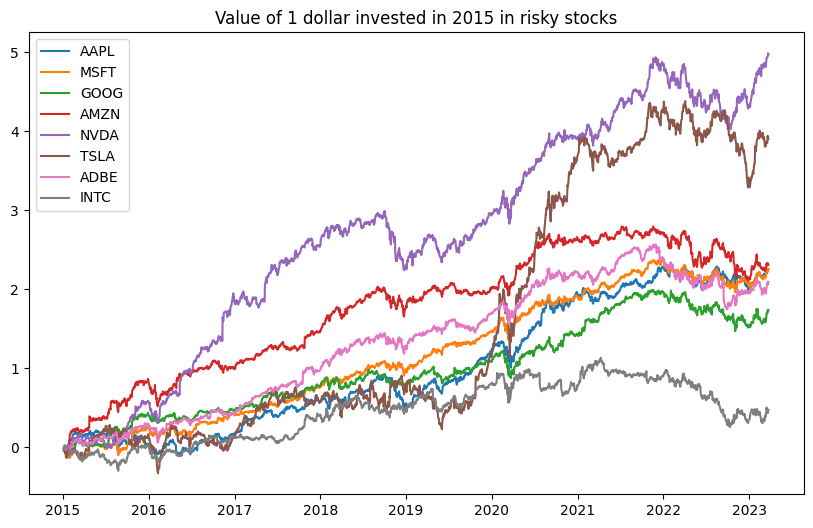

In [1155]:
hist_prices_cummulative[risky_tickers].plot(figsize=(10,6), title="Value of 1 dollar invested in 2015 in risky stocks")

In [1156]:
hist_prices[safe_tickers]

,PG,KO,PEP,COST,WMT,CL,UL,KDP
2015-01-02,71.304504,32.347385,74.446556,118.713013,71.957970,56.980305,30.481983,9.679823
2015-01-05,70.965492,32.347385,73.886887,117.363358,71.748535,56.559380,29.910162,9.650084
2015-01-06,70.642220,32.593010,73.327179,118.914246,72.301437,55.965145,29.757687,9.663604
2015-01-07,71.012794,32.999851,75.471344,120.984879,74.219749,56.410828,30.077902,9.804203
2015-01-08,71.824860,33.399010,76.842979,122.024384,75.786255,57.178371,30.634470,10.031327
...,...,...,...,...,...,...,...,...
2023-03-20,145.130005,60.599998,177.589996,489.290009,140.899994,73.080002,49.990002,35.220001
2023-03-21,144.080002,60.320000,178.009995,490.850006,140.419998,72.379997,50.560001,35.150002
2023-03-22,143.990005,60.049999,176.509995,487.519989,139.520004,72.129997,50.959999,34.669998
2023-03-23,143.789993,59.919998,175.649994,487.760010,140.649994,71.830002,50.980000,34.110001


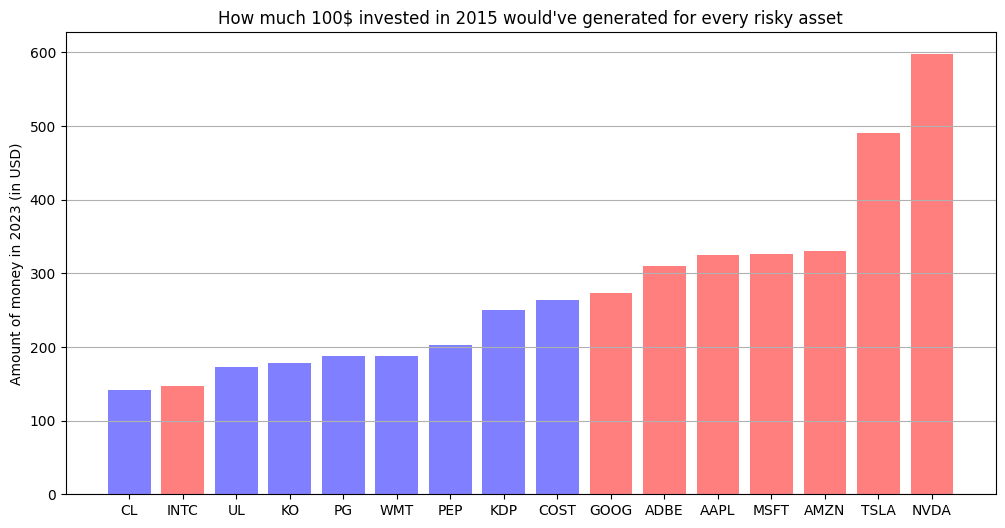

In [1216]:
plt.figure(figsize=(12, 6))

colors = ["red" if i in risky_tickers else "blue" for i in hist_prices_cummulative.iloc[-1].sort_values().index]
ax = plt.bar(height=((hist_prices_cummulative.iloc[-1].sort_values() + 1)*100), x=hist_prices_cummulative.iloc[-1].sort_values().index, color = colors, alpha=0.5)
plt.title("How much 100$ invested in 2015 would've generated for every risky asset")
plt.ylabel("Amount of money in 2023 (in USD)")
plt.grid(axis="y")

<Axes: >

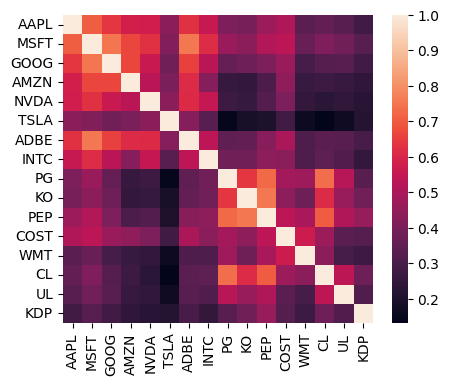

In [1158]:
corr = hist_prices.pct_change().corr()

fig = plt.gcf()

fig.set_size_inches(5, 4)

sns.heatmap(data=corr)

In [1159]:
hist_prices.pct_change().describe()

,AAPL,MSFT,GOOG,AMZN,NVDA,TSLA,ADBE,INTC,PG,KO,PEP,COST,WMT,CL,UL,KDP
count,2070.000000,2070.000000,2070.000000,2070.000000,2070.000000,2070.000000,2070.000000,2070.000000,2070.000000,2070.000000,2070.000000,2070.000000,2070.000000,2070.000000,2070.000000,2070.000000
mean,0.001083,0.001091,0.000839,0.001115,0.002402,0.001887,0.001012,0.000230,0.000422,0.000375,0.000497,0.000789,0.000423,0.000200,0.000352,0.000728
std,0.018785,0.017785,0.018089,0.021097,0.030490,0.036005,0.020773,0.020767,0.012085,0.011762,0.012088,0.014002,0.013817,0.012463,0.014125,0.014926
min,-0.128647,-0.147390,-0.111008,-0.140494,-0.187559,-0.210628,-0.167932,-0.180415,-0.087373,-0.096725,-0.114283,-0.124513,-0.113758,-0.097829,-0.144410,-0.164891
25%,-0.007567,-0.006726,-0.006912,-0.008634,-0.012024,-0.015420,-0.007495,-0.009142,-0.004939,-0.004561,-0.004782,-0.005663,-0.005859,-0.005423,-0.005848,-0.006233
50%,0.000899,0.000856,0.000913,0.001166,0.002520,0.001258,0.001681,0.000556,0.000570,0.000484,0.000551,0.001051,0.000527,0.000357,0.000432,0.000834
75%,0.010509,0.009952,0.009250,0.011065,0.017163,0.019111,0.011076,0.010281,0.006297,0.005970,0.006138,0.007486,0.006789,0.006194,0.006861,0.007098
max,0.119808,0.142169,0.160524,0.141311,0.298067,0.198949,0.177193,0.195213,0.120090,0.064796,0.129366,0.099595,0.117085,0.126083,0.140005,0.223941


### Creating the two portfolios

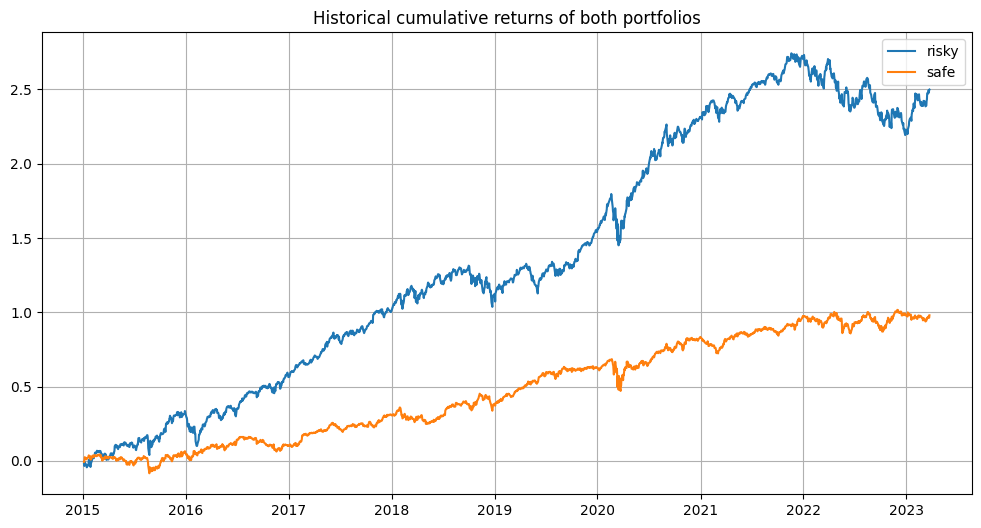

In [1222]:
risky_pf = risky_hist_prices.pct_change().mean(axis=1)
safe_pf = safe_hist_prices.pct_change().mean(axis=1)
pfs = pd.concat([risky_pf, safe_pf], keys = ["risky", "safe"], axis=1)
pfs.cumsum().plot(grid=True, title="Historical cumulative returns of both portfolios", figsize=(12, 6));

### Retrieving the economic indicator

In [1223]:
bc = pdr.get_data_fred(assets["indicator"], start = start, end=end)
bc.head()

,BSCICP03USM665S
DATE,
2015-01-01,100.185175
2015-02-01,99.969308
2015-03-01,99.821294
2015-04-01,99.781109
2015-05-01,99.841957


In [1224]:
bc.index = bc.index.date
pfs = pfs.combine_first(bc)

## 2. Creating the strategy

### Background information

To create a successful strategy we will need to take necessary precautions to make sure that the business confidence indicator is used properly.

There are countless issues that arise when building such a strategy, here are some examples:

- The economic indicator is reported on a different schedule that our stock prices (once every month vs daily)

- The economic indicator is too volatile and would propose trades that are too aggressive

- The economic indicator is cyclical

- etc.

### What we will do

1. Correct and clean the data

2. Create a system that ensures that we are protected from the issues stated above

3. Create logic that will be able to determine appropriate weighting to use for the final portfolio

4. Create an alternative strategy (to test another hyopthesis)

5. Measure and backtest our strategies


### Correct and clean the data

In [1225]:
pfs[assets["indicator"]] = pfs[assets["indicator"]].ffill()
pfs = pfs.dropna(subset=["risky", "safe"])

### Create a system that ensures that we are protected from the issues stated above


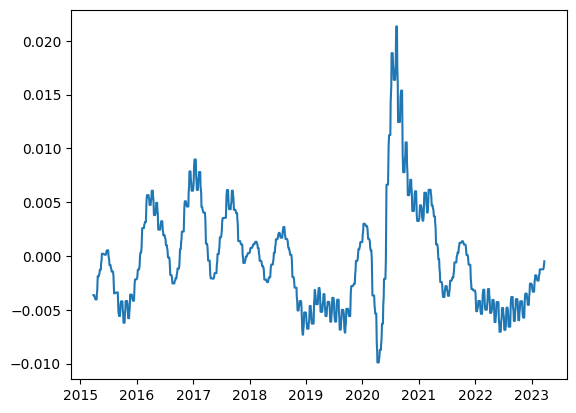

In [1226]:
pfs["indicator_"] = pfs[assets["indicator"]].rolling(5).mean().pct_change(periods=52)

plt.plot(pfs["indicator_"])

### Create logic that will be able to determine appropriate weighting to use for the final portfolio

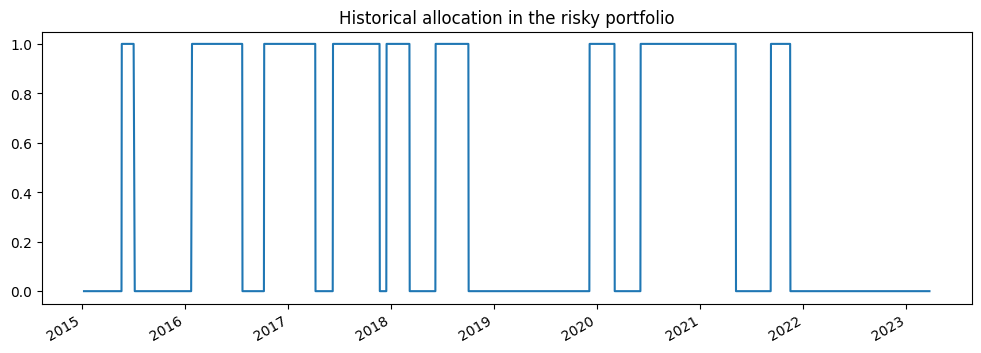

In [1248]:
pfs["riskon"] = (pfs["indicator_"] > 0).astype(int).rolling(3).apply(lambda x: mode(x)[0])


plt.figure(figsize=(12, 4))
plt.title("Historical allocation in the risky portfolio")
pfs["riskon"].plot();

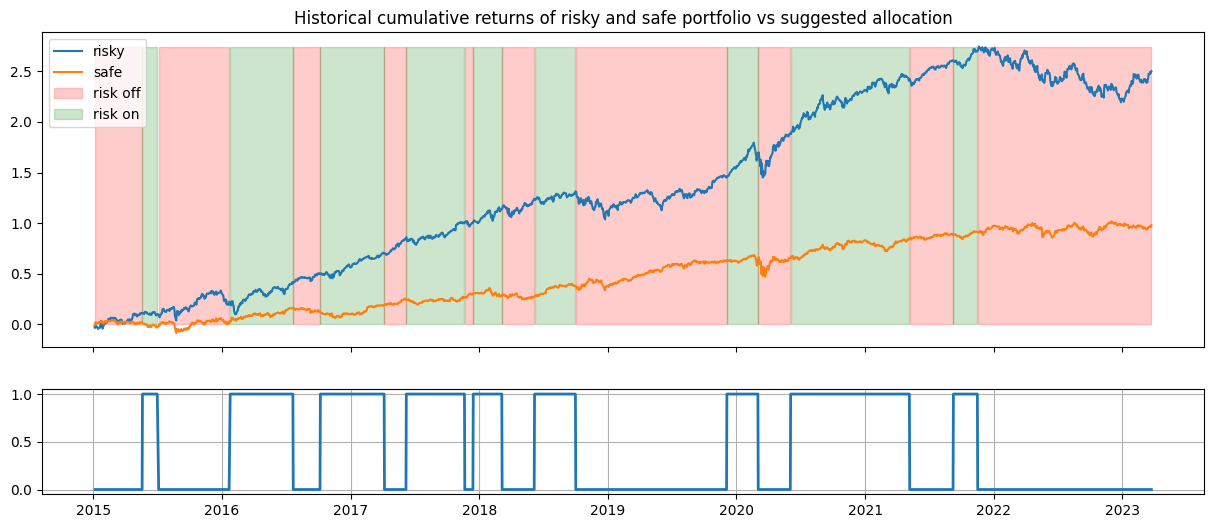

In [1228]:
fig, axs = plt.subplots(2, 1, sharex="all", figsize=(15, 6), gridspec_kw={'height_ratios': [3, 1]})

axs[0].set_title("Historical cumulative returns of risky and safe portfolio vs suggested allocation")
axs[0].plot(pfs[["risky", "safe"]].cumsum(), label=["risky", "safe"])

axs[0].fill_between(pfs.index, 0, max(pfs[["risky", "safe"]].cumsum().max()), where=(pfs["riskon"]==0), color="red", alpha=0.2, label="risk off")
axs[0].fill_between(pfs.index, 0, max(pfs[["risky", "safe"]].cumsum().max()), where=(pfs["riskon"]==1), color="green", alpha=0.2, label="risk on")

axs[1].plot(pfs["riskon"], linewidth=2)
axs[1].grid()
axs[0].legend();

In [1229]:
pfs["pf"] = pfs["risky"]*pfs["riskon"] + pfs["safe"]*(pfs["riskon"].astype(bool) ^ 1)
pfs.dropna()

,BSCICP03USM665S,risky,safe,indicator_,riskon,pf
2015-03-26,99.821294,-0.004305,0.000735,-0.003632,0.0,0.000735
2015-03-27,99.821294,0.005284,-0.000511,-0.003632,0.0,-0.000511
2015-03-30,99.821294,0.008009,0.009150,-0.003632,0.0,0.009150
2015-03-31,99.821294,-0.009080,-0.008347,-0.003632,0.0,-0.008347
2015-04-01,99.781109,-0.002087,-0.003152,-0.003712,0.0,-0.003152
...,...,...,...,...,...,...
2023-03-20,98.941576,-0.001554,0.011758,-0.001090,0.0,0.011758
2023-03-21,98.941576,0.022833,-0.001234,-0.000940,0.0,-0.001234
2023-03-22,98.941576,-0.014517,-0.004490,-0.000790,0.0,-0.004490
2023-03-23,98.941576,0.016429,-0.002469,-0.000640,0.0,-0.002469


### Create an alternative strategy (to test another hyopthesis)

The other hypothesis being that radical changes in allocation such as those proposed in the model above will yield negative effects, because of under diversification and transaction fees

In [1230]:
pfs["riskon_2"] = (pfs["indicator_"] - pfs["indicator_"].min())/(pfs["indicator_"].max() - pfs["indicator_"].min())
pfs["pf_2"] = pfs["risky"]*pfs["riskon_2"] + pfs["safe"]*(1-pfs["riskon_2"])

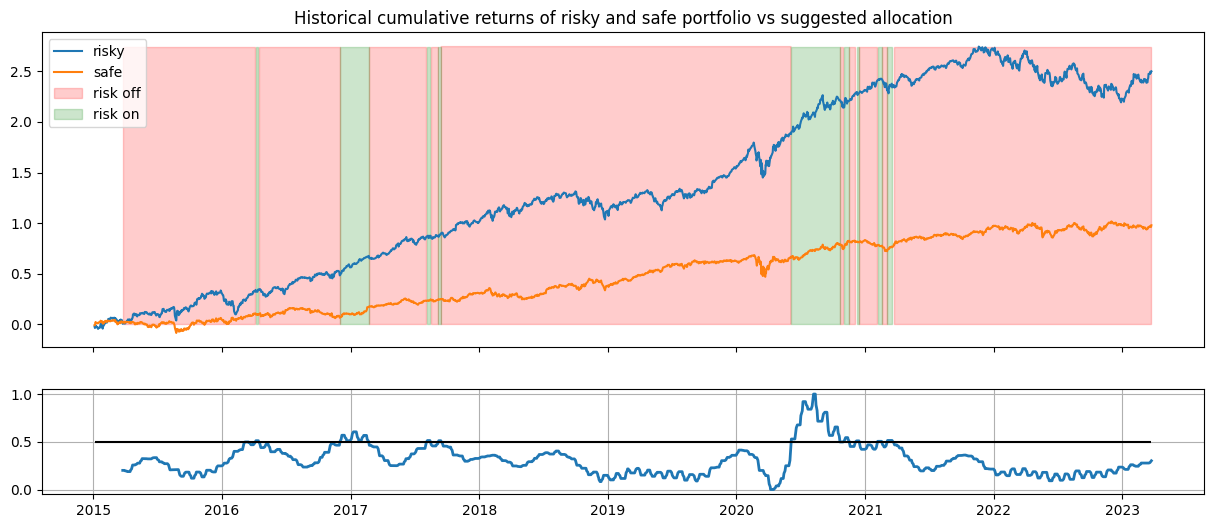

In [1231]:
fig, axs = plt.subplots(2, 1, sharex="all", figsize=(15, 6), gridspec_kw={'height_ratios': [3, 1]})

axs[0].set_title("Historical cumulative returns of risky and safe portfolio vs suggested allocation")
axs[0].plot(pfs[["risky", "safe"]].cumsum(), label=["risky", "safe"])

cutoff = 0.5
axs[0].fill_between(pfs.index, 0, max(pfs[["risky", "safe"]].cumsum().max()), where=(pfs["riskon_2"]<=cutoff), color="red", alpha=0.2, label="risk off")
axs[0].fill_between(pfs.index, 0, max(pfs[["risky", "safe"]].cumsum().max()), where=(pfs["riskon_2"]>cutoff), color="green", alpha=0.2, label="risk on")

axs[1].plot(pfs["riskon_2"], linewidth=2)
axs[1].hlines(cutoff, pfs.index[0], pfs.index[-1], color="black")
axs[1].grid()

axs[0].legend();

### Measure and backtest our strategies

In [1232]:
desc = pfs.describe()
desc

,BSCICP03USM665S,risky,safe,indicator_,riskon,pf,riskon_2,pf_2
count,2070.000000,2070.000000,2070.000000,2014.000000,2068.000000,2068.000000,2014.000000,2014.000000
mean,100.263968,0.001208,0.000473,-0.000257,0.422147,0.001003,0.308625,0.000779
std,0.989875,0.017676,0.009654,0.004878,0.494021,0.012520,0.156281,0.010840
min,98.144477,-0.142364,-0.089424,-0.009891,0.000000,-0.089424,0.000000,-0.099984
25%,99.423689,-0.006546,-0.003958,-0.004033,0.000000,-0.004579,0.187661,-0.003847
50%,100.215526,0.001941,0.000633,-0.001007,0.000000,0.001312,0.284612,0.001181
75%,101.223106,0.010311,0.005201,0.002450,1.000000,0.007257,0.395341,0.006065
max,102.003119,0.110200,0.092827,0.021324,1.000000,0.092827,1.000000,0.087148


In [1233]:
desc = pfs[["risky", "safe", "pf_2", "pf"]].describe()
desc.loc[len(desc)] = (desc.loc["mean"])/(desc.loc["std"])
desc.rename(index={8:'Sharpe'},inplace=True)

desc

,risky,safe,pf_2,pf
count,2070.000000,2070.000000,2014.000000,2068.000000
mean,0.001208,0.000473,0.000779,0.001003
std,0.017676,0.009654,0.010840,0.012520
min,-0.142364,-0.089424,-0.099984,-0.089424
25%,-0.006546,-0.003958,-0.003847,-0.004579
50%,0.001941,0.000633,0.001181,0.001312
75%,0.010311,0.005201,0.006065,0.007257
max,0.110200,0.092827,0.087148,0.092827
Sharpe,0.068311,0.049023,0.071864,0.080128


#### Looking at weekly returns

In [1234]:
pfs.index = pd.to_datetime(pfs.index)
pfs_weekly = pfs[["risky", "safe", "pf"]].resample("W").sum()

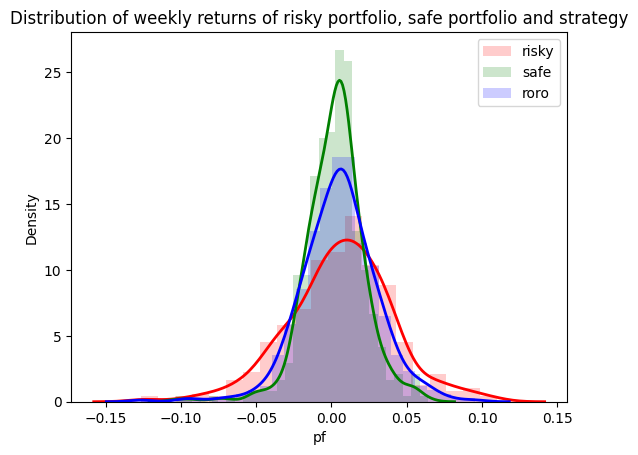

In [1235]:
kwargs = dict(hist_kws={'alpha':0.2}, kde_kws={'linewidth':2})

dist = sns.distplot(pfs_weekly.risky, color="red", label="risky", **kwargs);
dist = sns.distplot(pfs_weekly.safe, color="green", label="safe", **kwargs);
dist = sns.distplot(pfs_weekly.pf, color="blue", label="roro", **kwargs);


plt.title("Distribution of weekly returns of risky portfolio, safe portfolio and strategy")
plt.ylabel("Density")

plt.legend()

#### Comparing to an index (equally weighted asset classes)

In [1236]:
pfs["pf_dummy"] = pfs["risky"]*0.5 + pfs["safe"]*0.5

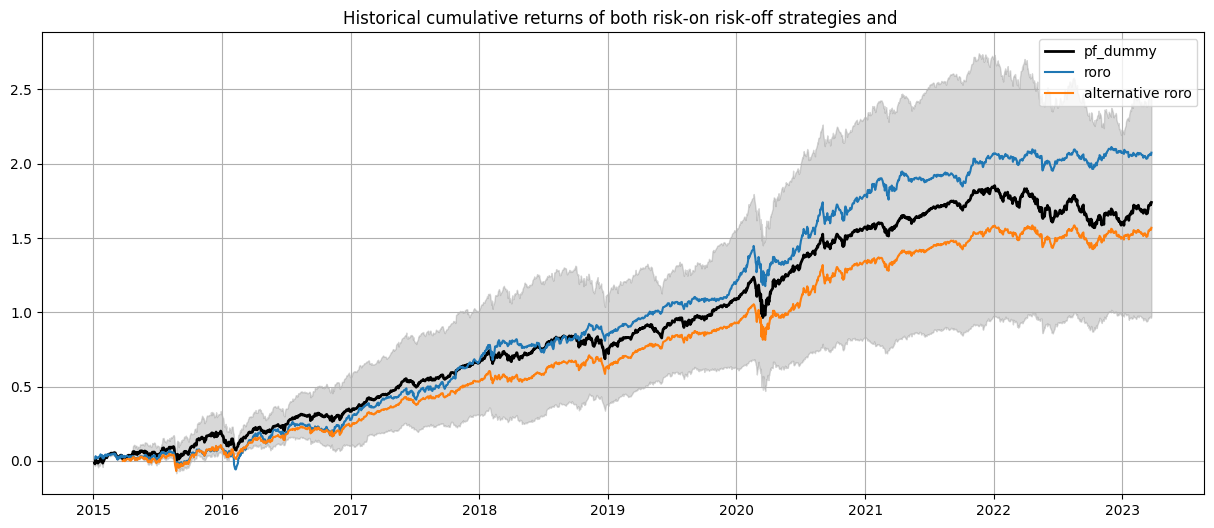

In [1237]:
plt.figure(figsize=(15, 6))

plt.title("Historical cumulative returns of both risk-on risk-off strategies and ")

plt.plot(pfs["pf_dummy"].cumsum(), label="pf_dummy", color="black", linewidth=2)
plt.plot(pfs["pf"].cumsum(), label="roro")
plt.plot(pfs["pf_2"].cumsum(), label="alternative roro")

plt.fill_between(pfs.index, pfs["risky"].cumsum(), pfs["safe"].cumsum(), color="grey", alpha=0.3)
plt.legend()
plt.grid()

#### Why is the seemingly "better" alternative not performing better?

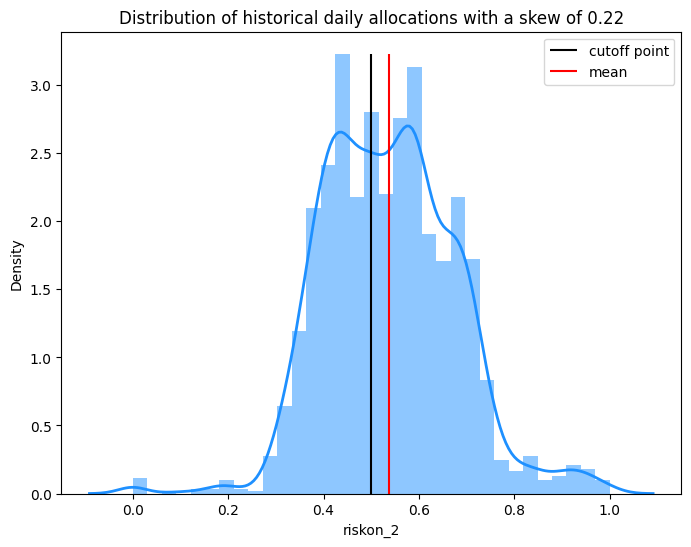

In [1243]:
plt.figure(figsize=(8,6))

test_riskon = pfs["riskon_2"]**(1/2)

kwargs = dict(hist_kws={'alpha':0.5}, kde_kws={'linewidth':2})
dist = sns.distplot(test_riskon, color="dodgerblue", **kwargs);
plt.vlines(cutoff, 0, dist.dataLim.bounds[-1], color="black", label="cutoff point")
plt.vlines(test_riskon.mean(), 0, dist.dataLim.bounds[-1], color="red", label="mean")

plt.legend()
plt.title(f"Distribution of historical daily allocations with a skew of {round(test_riskon.skew(), 2)}");

#### Let's apply our adjustments

In [1244]:
pfs["riskon_2"] = pfs["riskon_2"]**(1/2)
pfs["pf_2"] = pfs["risky"]*pfs["riskon_2"] + pfs["safe"]*(1-pfs["riskon_2"])

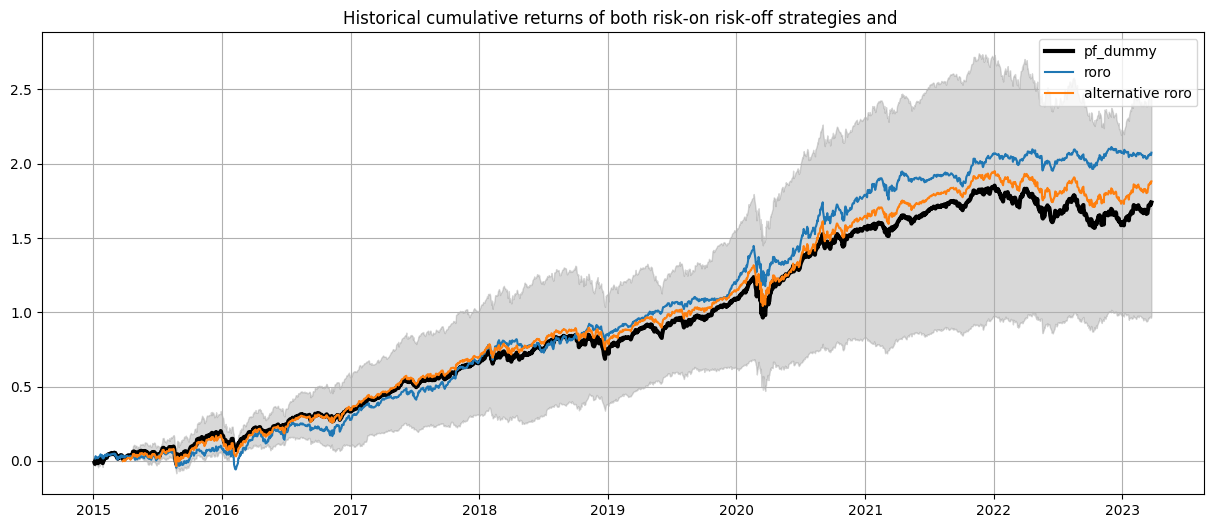

In [1245]:
plt.figure(figsize=(15, 6))

plt.title("Historical cumulative returns of both risk-on risk-off strategies and ")

plt.plot(pfs["pf_dummy"].cumsum(), label="pf_dummy", color="black", linewidth=3)
plt.plot(pfs["pf"].cumsum(), label="roro")
plt.plot(pfs["pf_2"].cumsum(), label="alternative roro")

plt.fill_between(pfs.index, pfs["risky"].cumsum(), pfs["safe"].cumsum(), color="grey", alpha=0.3)
plt.legend()
plt.grid()

In [1246]:
desc = pfs[["pf", "pf_2", "pf_dummy"]].describe()
desc.loc[len(desc)] = (desc.loc["mean"])/(desc.loc["std"])
desc.rename(index={8:'Sharpe'},inplace=True)

desc

,pf,pf_2,pf_dummy
count,2068.000000,2014.000000,2070.000000
mean,0.001003,0.000934,0.000840
std,0.012520,0.012479,0.012185
min,-0.089424,-0.113068,-0.115894
25%,-0.004579,-0.004682,-0.004588
50%,0.001312,0.001405,0.001436
75%,0.007257,0.006955,0.006829
max,0.092827,0.088503,0.090595
Sharpe,0.080128,0.074860,0.068969


## 3. Conclusion

### About the strategy

- Sometimes less is better

- Applicability remains a concern (what if we had trading fees ?)

- The risk measures we used are limited (risk measures are either too complicated or too limited)


### How we can improve our strategy

- By including more economic indicators (maximum 5)

- By including bonds

- By taking into consideration trading fees


### What we've learned about the markets

- Markets are very difficult to predict

- Benchmarks need to be edaquate, and need to be applicable

- Correlation between assests largely depends on how the economy is doing